In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pylab

In [2]:
df_clinical = pd.read_csv('train_clinical_data.csv')
sup_clinical_df = pd.read_csv('supplemental_clinical_data.csv')
df_peptides = pd.read_csv('train_peptides.csv')
df_proteins = pd.read_csv('train_proteins.csv')

In [3]:
df_clinical.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [4]:
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [5]:
df_clinical.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000


In [6]:
df_clinical = df_clinical.fillna(df_clinical.mean(numeric_only=True))
df_clinical.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   0
updrs_2                                   0
updrs_3                                   0
updrs_4                                   0
upd23b_clinical_state_on_medication    1327
dtype: int64

In [7]:
df_clinical['upd23b_clinical_state_on_medication'] = df_clinical['upd23b_clinical_state_on_medication'].fillna(method='ffill')
df_clinical['upd23b_clinical_state_on_medication'] = df_clinical['upd23b_clinical_state_on_medication'].fillna(df_clinical['upd23b_clinical_state_on_medication'].mode()[0])

df_clinical['upd23b_clinical_state_on_medication'] = df_clinical['upd23b_clinical_state_on_medication'].replace({'On': 1, 'Off': 0})
df_clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,1.861763,1
1,55_3,55,3,10.0,7.0,25.0,1.861763,1
2,55_6,55,6,8.0,10.0,34.0,1.861763,1
3,55_9,55,9,8.0,9.0,30.0,0.000000,1
4,55_12,55,12,10.0,10.0,41.0,0.000000,1
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.000000,0
2611,65043_54,65043,54,4.0,8.0,11.0,1.000000,0
2612,65043_60,65043,60,6.0,6.0,16.0,1.000000,0
2613,65043_72,65043,72,3.0,9.0,14.0,1.000000,0


In [8]:
def find_outliers(col_name):
    Q1 = df_clinical[col_name].quantile(0.25)
    Q3 = df_clinical[col_name].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+(1.5*IQR)
    print(f"{col_name} ----->")
    print("Q1 ------------ ", Q1)
    print("Q3 ------------ ", Q3)
    print("IQR ----------- ", IQR)
    print("Upper limit --- ", upper_limit)
    print("Lower_limit --- ", lower_limit)
    outliers = df_clinical[(df_clinical[col_name] < lower_limit) | (df_clinical[col_name] > upper_limit)]
    print("Total outliers count are : ", outliers.shape[0])
    print("=====================================")

In [9]:
find_outliers('updrs_1')
find_outliers('updrs_2')
find_outliers('updrs_3')
find_outliers('updrs_4')

updrs_1 ----->
Q1 ------------  3.0
Q3 ------------  10.0
IQR -----------  7.0
Upper limit ---  20.5
Lower_limit ---  -7.5
Total outliers count are :  62
updrs_2 ----->
Q1 ------------  1.0
Q3 ------------  10.0
IQR -----------  9.0
Upper limit ---  23.5
Lower_limit ---  -12.5
Total outliers count are :  45
updrs_3 ----->
Q1 ------------  6.0
Q3 ------------  29.0
IQR -----------  23.0
Upper limit ---  63.5
Lower_limit ---  -28.5
Total outliers count are :  11
updrs_4 ----->
Q1 ------------  0.0
Q3 ------------  1.8617628408370324
IQR -----------  1.8617628408370324
Upper limit ---  4.654407102092581
Lower_limit ---  -2.7926442612555484
Total outliers count are :  276


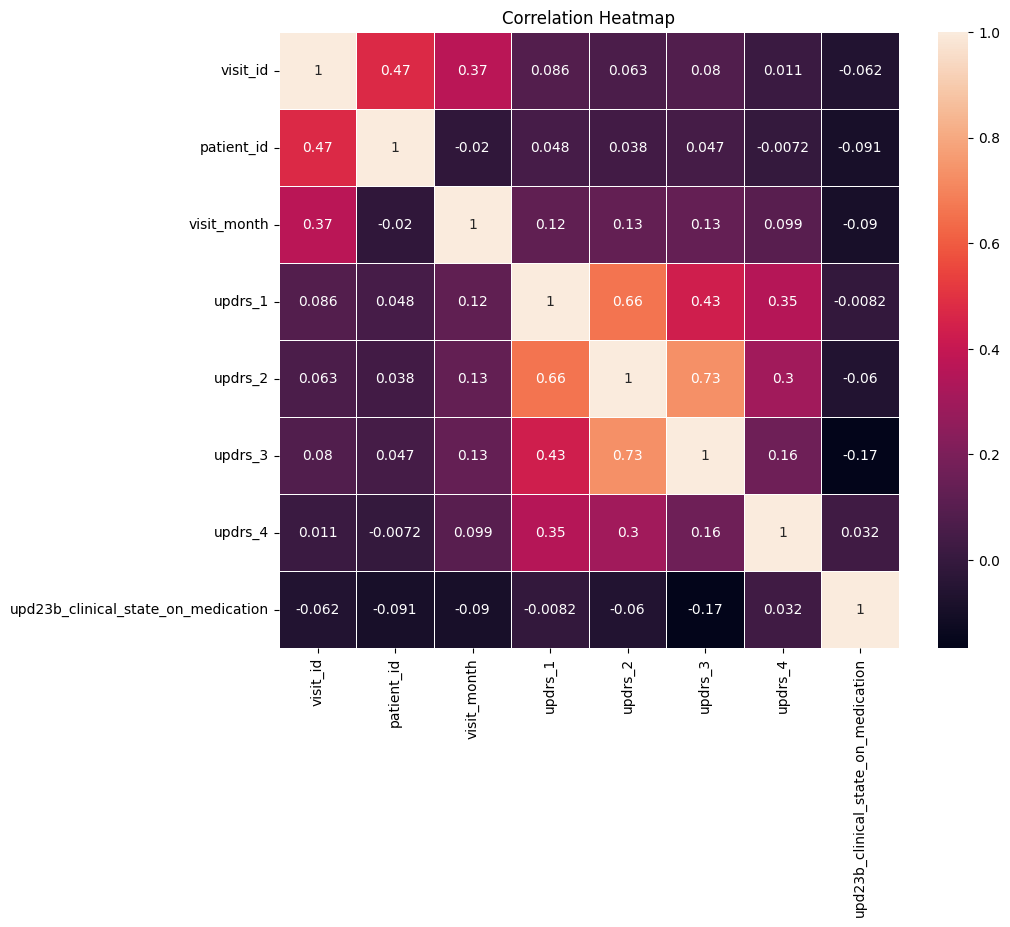

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df_clinical.corr(),  linewidths=.5, annot=True)

plt.title("Correlation Heatmap")

plt.show()


In [11]:
df_clinical.patient_id.sample()

1472    35675
Name: patient_id, dtype: int64

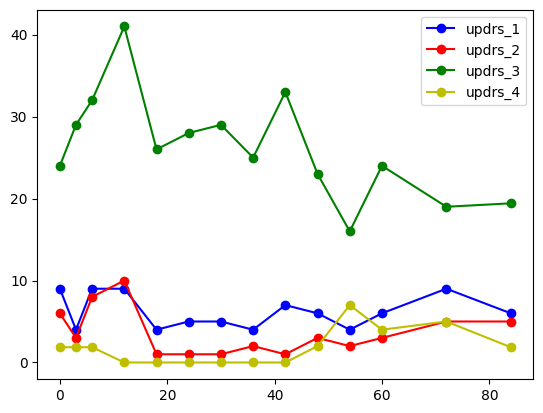

In [12]:
plot_df = df_clinical[df_clinical["patient_id"]==49672]

fig, ax = plt.subplots(1, 1)

ax.plot(plot_df['visit_month'], plot_df['updrs_1'], 'bo-', label="updrs_1")
ax.plot(plot_df['visit_month'], plot_df['updrs_2'], 'ro-', label="updrs_2")
ax.plot(plot_df['visit_month'], plot_df['updrs_3'], 'go-', label="updrs_3")
ax.plot(plot_df['visit_month'], plot_df['updrs_4'], 'yo-', label="updrs_4")
ax.legend()
plt.show()


In [13]:
df_peptides.isna().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [14]:
df_proteins.isna().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [15]:
def generate_data(df_pro, df_pep):
    df_protein_grouped = df_pro.groupby(['visit_id', 'UniProt'])['NPX'].mean().reset_index()
    df_peptide_grouped = df_pep.groupby(['visit_id', 'Peptide'])['PeptideAbundance'].mean().reset_index()
    df_pro = df_protein_grouped.pivot(index='visit_id', columns='UniProt', values='NPX').reset_index()
    df_pep = df_peptide_grouped.pivot(index='visit_id', columns='Peptide', values='PeptideAbundance').reset_index()
    pro_pep_df = df_pro.merge(df_pep, on='visit_id', how='left')
    return pro_pep_df

In [16]:
pro_pep_df = generate_data(df_proteins, df_peptides)

In [17]:
pro_pep_df.head()

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
1,10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
2,10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
3,10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
4,10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09


In [18]:
pro_pep_df.isnull().sum()

visit_id                   0
O00391                   349
O00533                     1
O00584                    13
O14498                    81
                        ... 
YVNKEIQNAVNGVK             2
YWGVASFLQK                24
YYC(UniMod_4)FQGNQFLR      8
YYTYLIMNK                 83
YYWGGQYTWDMAK            248
Length: 1196, dtype: int64

In [19]:
pro_pep_df = pro_pep_df.fillna(pro_pep_df.mean())
pro_pep_df

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,10053_0,9104.270000,402321.0,26505.529157,27305.934884,7150.570000,2497.840000,83002.9,15113.6,167327.0,...,202274.0,9015.134433,4.401830e+06,77482.6,583075.0,76705.7,104260.0,530223.000000,47068.709311,7207.30000
1,10053_12,10464.200000,435586.0,26505.529157,27305.934884,17688.295406,3004.990691,197117.0,15099.1,164268.0,...,201009.0,9015.134433,5.001750e+06,36745.3,355643.0,92078.1,123254.0,453883.000000,49281.900000,25332.80000
2,10053_18,13235.700000,507386.0,7126.960000,24525.700000,17688.295406,2372.710000,126506.0,16289.6,168107.0,...,220728.0,9015.134433,5.424380e+06,39016.0,496021.0,63203.6,128336.0,447505.000000,52389.100000,21235.70000
3,10138_12,12600.200000,494581.0,9165.060000,27193.500000,22506.100000,6015.900000,156313.0,54546.4,204013.0,...,188362.0,9433.710000,3.900280e+06,48210.3,328482.0,89822.1,129964.0,552232.000000,65657.800000,9876.98000
4,10138_24,12003.200000,522138.0,4498.510000,17189.800000,29112.400000,2665.150000,151169.0,52338.1,240892.0,...,206187.0,6365.150000,3.521800e+06,69984.6,496737.0,80919.3,111799.0,471554.596652,56977.600000,4903.09000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,8699_24,9983.000000,400290.0,24240.100000,27305.934884,16943.500000,6303.170000,77493.6,46435.3,254247.0,...,289888.0,8615.270000,8.770410e+06,33599.1,926094.0,118897.0,133682.0,571879.000000,80268.300000,54889.70000
1109,942_12,6757.320000,360858.0,18367.600000,14760.700000,18603.400000,1722.770000,86847.4,37741.3,212132.0,...,173259.0,4767.630000,3.743070e+05,35767.3,250397.0,65966.9,77976.8,486239.000000,45032.700000,21072.04823
1110,942_24,11641.264435,352722.0,22834.900000,23393.100000,16693.500000,1487.910000,114772.0,36095.7,185836.0,...,185428.0,5554.530000,3.937256e+06,64049.8,479473.0,68505.7,74483.1,561398.000000,52916.400000,21847.60000
1111,942_48,11627.800000,251820.0,22046.500000,26360.500000,22440.200000,2117.430000,82241.9,30146.6,167633.0,...,137611.0,6310.090000,3.937256e+06,28008.8,231359.0,63265.8,64601.8,632782.000000,51123.700000,20700.30000


In [20]:
def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]


In [21]:
def smape(A, F):
    # Symmetric mean absolute percentage
    # A ---- Actual value
    # F ---- Forecasted/Predicted value
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [22]:
# dictionary to store the models trained for each label.
model_dict = {}

# dictionary to store the mse score of the models trained for each label.
mse_dict = {}

# dictionary to store the sMAPE scores of the models trained for each label.
smape_dict = {}


In [24]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [25]:
FEATURES = [i for i in pro_pep_df.columns if i not in ["visit_id"]]
FEATURES.append("visit_month")

In [26]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

# Loop through each label   
for label in target:
    # Merge the label 'visit_id', 'patient_id', 'visit_month' and label columns from `train_clinical` 
    # data frame to `pro_prep_df` data frame on the `visit_id` column.
    dataset_df = pro_pep_df.merge(df_clinical[['visit_id', 'patient_id', 'visit_month', label]], on = ['visit_id'], how = 'left')
    
    # Drop null value label rows
    dataset_df = dataset_df.dropna(subset=[label])
    
    # Make a new copy of the FEATURES list we created previously. Add `label` to it.
    feature_list = FEATURES.copy() 
    feature_list.append(label)
    
    # Split the dataset into train and validation datasets.
    train_df, valid_df = split_dataset(dataset_df[feature_list])
    print("{} examples in training, {} examples in testing.".format(len(train_df), len(valid_df)))
    
    # Convert the dataset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label, task = tfdf.keras.Task.REGRESSION)
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label=label, task = tfdf.keras.Task.REGRESSION)
    
    # Create the Random Forest Tree Model with modified hyperparameters.
    rf = tfdf.keras.GradientBoostedTreesModel(
        task=tfdf.keras.Task.REGRESSION,
        max_depth=6,  # Modify the maximum depth of the trees
        subsample=0.8,  # Modify the subsample ratio
        verbose=0
    )
    
    rf.compile(metrics=["mse"])
    
    # Train the model.
    rf.fit(x=train_ds)
    
    # Store the model
    model_dict[label] = rf

    # Evaluate the trained model on the validation dataset and store the mse value in the `mse_dict`.
    inspector = rf.make_inspector()
    inspector.evaluation()
    evaluation = rf.evaluate(x=valid_ds,return_dict=True)
    mse_dict[label] = evaluation["mse"]  
    
    # Use the trained model to make predictions on the validation dataset.
    # Using these predictions, calculate and store the sMAPE value for this model.
    preds = rf.predict(valid_ds)
    smape_dict[label] = smape(valid_df[label].values.tolist(), preds.flatten())

869 examples in training, 199 examples in testing.


2023-06-14 15:11:52.452868: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
[WARNING 23-06-14 15:11:55.2725 IST gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:11:55.2725 IST gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:11:55.2725 IST gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-06-14 15:11:55.402068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_995' with dtype double and shape [869]
	 [[{{node Placeholder/_995}}]]
[INFO 23-06-14 15:12:24.3706 IST kernel.cc:1242] Loading model from path /tmp/tmppep21gw5/mode

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2023-06-14 15:12:30.625122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_996' with dtype double and shape [199]
	 [[{{node Placeholder/_996}}]]


1/1 [==============================] - 1s 1s/step
876 examples in training, 192 examples in testing.


[WARNING 23-06-14 15:12:36.5819 IST gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:12:36.5819 IST gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:12:36.5819 IST gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-06-14 15:12:36.638770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_24' with dtype double and shape [876]
	 [[{{node Placeholder/_24}}]]
[INFO 23-06-14 15:13:27.0193 IST kernel.cc:1242] Loading model from path /tmp/tmpak_paysm/model/ with prefix accbcbd4e3174e70
[INFO 23-06-14 15:13:27.0378 IST abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23-0

1/1 [==============================] - 1s 1s/step
859 examples in training, 209 examples in testing.


[WARNING 23-06-14 15:13:38.5138 IST gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:13:38.5138 IST gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:13:38.5138 IST gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-06-14 15:13:38.574407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_739' with dtype double and shape [859]
	 [[{{node Placeholder/_739}}]]
[INFO 23-06-14 15:14:14.0737 IST kernel.cc:1242] Loading model from path /tmp/tmpee_gn5r4/model/ with prefix 058bb72757724642
[INFO 23-06-14 15:14:14.0841 IST abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23

2023-06-14 15:14:19.395325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_997' with dtype double and shape [209]
	 [[{{node Placeholder/_997}}]]


1/1 [==============================] - 1s 1s/step
862 examples in training, 206 examples in testing.


[WARNING 23-06-14 15:14:25.1434 IST gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:14:25.1434 IST gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-06-14 15:14:25.1435 IST gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-06-14 15:14:25.206237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_139' with dtype double and shape [862]
	 [[{{node Placeholder/_139}}]]
[INFO 23-06-14 15:14:42.8810 IST kernel.cc:1242] Loading model from path /tmp/tmpgizr52t_/model/ with prefix 8e45efc3854f45c9
[INFO 23-06-14 15:14:42.8826 IST abstract_model.cc:1311] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23

1/1 [==============================] - 2s 2s/step


In [27]:
for name, value in mse_dict.items():
  print(f"label {name}: mse {value:.4f}")

print("\nAverage mse", sum(mse_dict.values())/4)

label updrs_1: mse 26.3984
label updrs_2: mse 28.8794
label updrs_3: mse 153.6845
label updrs_4: mse 5.6406

Average mse 53.650734543800354


In [28]:
for name, value in smape_dict.items():
  print(f"label {name}: sMAPE {value:.4f}")

print("\nAverage sMAPE", sum(smape_dict.values())/4)


label updrs_1: sMAPE 67.8560
label updrs_2: sMAPE 89.2114
label updrs_3: sMAPE 83.6161
label updrs_4: sMAPE 93.7797

Average sMAPE 83.61581203560294


In [48]:
# Let us use the model for the label `updrs_1` for this purpose
tfdf.model_plotter.plot_model_in_colab(model_dict['updrs_1'], tree_idx=0, max_depth=3)

In [49]:
model_dict['updrs_1'].make_inspector().evaluation()

Evaluation(num_examples=None, accuracy=None, loss=4.460869312286377, rmse=4.460869312286377, ndcg=None, aucs=None, auuc=None, qini=None)

In [50]:
model_dict['updrs_1'].make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=None, accuracy=None, loss=5.694084167480469, rmse=5.694084167480469, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=2, evaluation=Evaluation(num_examples=None, accuracy=None, loss=5.550079822540283, rmse=5.550079822540283, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=3, evaluation=Evaluation(num_examples=None, accuracy=None, loss=5.5034499168396, rmse=5.5034499168396, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=4, evaluation=Evaluation(num_examples=None, accuracy=None, loss=5.420742511749268, rmse=5.420742511749268, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=5, evaluation=Evaluation(num_examples=None, accuracy=None, loss=5.354447841644287, rmse=5.354447841644287, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=6, evaluation=Evaluation(num_examples=None, accuracy=None, loss=5.315851211547852, rmse=5.315851211547852, ndcg=None, a

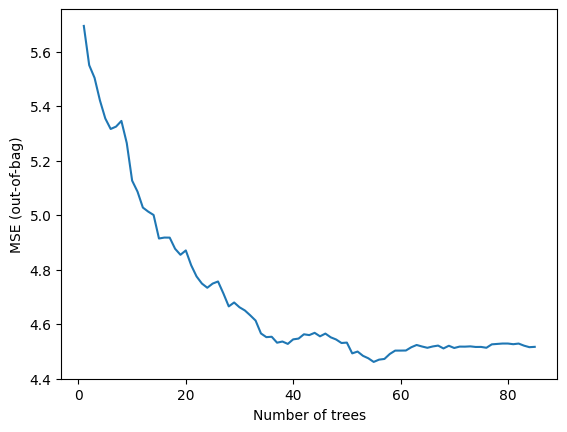

In [51]:
# Let us use the model for the label `updrs_1` for this purpose
logs = model_dict['updrs_1'].make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("MSE (out-of-bag)")
plt.show()

In [52]:
dataset_df = pro_pep_df.merge(df_clinical[['visit_id', 'patient_id', 'visit_month']], on = ['visit_id'], how = 'left')
dataset_df[FEATURES]

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK,visit_month
0,9104.270000,402321.0,26505.529157,27305.934884,7150.570000,2497.840000,83002.9,15113.6,167327.0,129048.0,...,9015.134433,4.401830e+06,77482.6,583075.0,76705.7,104260.0,530223.000000,47068.709311,7207.30000,0.0
1,10464.200000,435586.0,26505.529157,27305.934884,17688.295406,3004.990691,197117.0,15099.1,164268.0,108114.0,...,9015.134433,5.001750e+06,36745.3,355643.0,92078.1,123254.0,453883.000000,49281.900000,25332.80000,12.0
2,13235.700000,507386.0,7126.960000,24525.700000,17688.295406,2372.710000,126506.0,16289.6,168107.0,163776.0,...,9015.134433,5.424380e+06,39016.0,496021.0,63203.6,128336.0,447505.000000,52389.100000,21235.70000,18.0
3,12600.200000,494581.0,9165.060000,27193.500000,22506.100000,6015.900000,156313.0,54546.4,204013.0,56725.0,...,9433.710000,3.900280e+06,48210.3,328482.0,89822.1,129964.0,552232.000000,65657.800000,9876.98000,12.0
4,12003.200000,522138.0,4498.510000,17189.800000,29112.400000,2665.150000,151169.0,52338.1,240892.0,85767.1,...,6365.150000,3.521800e+06,69984.6,496737.0,80919.3,111799.0,471554.596652,56977.600000,4903.09000,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,9983.000000,400290.0,24240.100000,27305.934884,16943.500000,6303.170000,77493.6,46435.3,254247.0,138910.0,...,8615.270000,8.770410e+06,33599.1,926094.0,118897.0,133682.0,571879.000000,80268.300000,54889.70000,24.0
1109,6757.320000,360858.0,18367.600000,14760.700000,18603.400000,1722.770000,86847.4,37741.3,212132.0,100519.0,...,4767.630000,3.743070e+05,35767.3,250397.0,65966.9,77976.8,486239.000000,45032.700000,21072.04823,12.0
1110,11641.264435,352722.0,22834.900000,23393.100000,16693.500000,1487.910000,114772.0,36095.7,185836.0,99183.5,...,5554.530000,3.937256e+06,64049.8,479473.0,68505.7,74483.1,561398.000000,52916.400000,21847.60000,24.0
1111,11627.800000,251820.0,22046.500000,26360.500000,22440.200000,2117.430000,82241.9,30146.6,167633.0,84875.1,...,6310.090000,3.937256e+06,28008.8,231359.0,63265.8,64601.8,632782.000000,51123.700000,20700.30000,48.0


In [53]:
dataset_df[FEATURES].sum(axis=1)!=0

0       True
1       True
2       True
3       True
4       True
        ... 
1108    True
1109    True
1110    True
1111    True
1112    True
Length: 1113, dtype: bool

In [54]:
def get_predictions(test_df, test_ds, model_dict):

    # Target labels
    target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
    temp = test_df[FEATURES].copy()
    
    # Filter out all the 0 value columns before predicting
    mask = test_df[FEATURES].sum(axis=1) != 0
    new_test_df = temp.loc[mask]
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(new_test_df, task = tfdf.keras.Task.REGRESSION)
    for u in target:
        test_df['result_' + str(u)] = 0
        if u != 'updrs_4':
            print(model_dict[u])
            test_df.loc[mask, 'result_' + str(u)] = model_dict[u].predict(test_ds)
    
    # Format for final submission
    result = pd.DataFrame()

    for m in [0, 6, 12, 24]:
        for u in [1, 2, 3, 4]:

            temp = test_df[["visit_id", "result_updrs_" + str(u)]].copy()
            temp["prediction_id"] = temp["visit_id"] + "_updrs_" + str(u) + "_plus_" + str(m) + "_months"
            temp["rating"] = temp["result_updrs_" + str(u)]
            temp = temp [['prediction_id', 'rating']]

            result = pd.concat([result,temp])
    result = result.drop_duplicates(subset=['prediction_id', 'rating'])

    return result

In [55]:
generate_data(
    pd.read_csv('example_test_files/test_proteins.csv'),
    pd.read_csv('example_test_files/test_peptides.csv'),
)

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15031,O15240,O15394,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,3342_6,14564.0,616804.0,61418.1,27830.1,14959.2,2853.12,NaN,223373.0,58863.0,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
1,50423_0,33127.9,490742.0,43615.3,NaN,16486.6,2882.42,11963.7,124344.0,57688.1,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [58]:
pro_pep_df

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,10053_0,9104.270000,402321.0,26505.529157,27305.934884,7150.570000,2497.840000,83002.9,15113.6,167327.0,...,202274.0,9015.134433,4.401830e+06,77482.6,583075.0,76705.7,104260.0,530223.000000,47068.709311,7207.30000
1,10053_12,10464.200000,435586.0,26505.529157,27305.934884,17688.295406,3004.990691,197117.0,15099.1,164268.0,...,201009.0,9015.134433,5.001750e+06,36745.3,355643.0,92078.1,123254.0,453883.000000,49281.900000,25332.80000
2,10053_18,13235.700000,507386.0,7126.960000,24525.700000,17688.295406,2372.710000,126506.0,16289.6,168107.0,...,220728.0,9015.134433,5.424380e+06,39016.0,496021.0,63203.6,128336.0,447505.000000,52389.100000,21235.70000
3,10138_12,12600.200000,494581.0,9165.060000,27193.500000,22506.100000,6015.900000,156313.0,54546.4,204013.0,...,188362.0,9433.710000,3.900280e+06,48210.3,328482.0,89822.1,129964.0,552232.000000,65657.800000,9876.98000
4,10138_24,12003.200000,522138.0,4498.510000,17189.800000,29112.400000,2665.150000,151169.0,52338.1,240892.0,...,206187.0,6365.150000,3.521800e+06,69984.6,496737.0,80919.3,111799.0,471554.596652,56977.600000,4903.09000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,8699_24,9983.000000,400290.0,24240.100000,27305.934884,16943.500000,6303.170000,77493.6,46435.3,254247.0,...,289888.0,8615.270000,8.770410e+06,33599.1,926094.0,118897.0,133682.0,571879.000000,80268.300000,54889.70000
1109,942_12,6757.320000,360858.0,18367.600000,14760.700000,18603.400000,1722.770000,86847.4,37741.3,212132.0,...,173259.0,4767.630000,3.743070e+05,35767.3,250397.0,65966.9,77976.8,486239.000000,45032.700000,21072.04823
1110,942_24,11641.264435,352722.0,22834.900000,23393.100000,16693.500000,1487.910000,114772.0,36095.7,185836.0,...,185428.0,5554.530000,3.937256e+06,64049.8,479473.0,68505.7,74483.1,561398.000000,52916.400000,21847.60000
1111,942_48,11627.800000,251820.0,22046.500000,26360.500000,22440.200000,2117.430000,82241.9,30146.6,167633.0,...,137611.0,6310.090000,3.937256e+06,28008.8,231359.0,63265.8,64601.8,632782.000000,51123.700000,20700.30000


In [60]:
def get_result(test, test_peptides, test_proteins):
    pro_pep_df = generate_data(test_proteins, test_peptides)
    test_proteins = test_proteins.pivot(index=['visit_id', 'visit_month', 'patient_id'], 
              columns='UniProt', values='NPX').reset_index().rename_axis(None, axis=1).drop(columns=['visit_month', 'patient_id'])
    
    # merged_df = test.merge(test_proteins, how='left', on='visit_id')

    test_df = test.merge(pro_pep_df, how='left', on='visit_id')
    
    # Add all the missing columns from FEATURES list and set the values as 0
    for col in FEATURES:
        if col not in test_df.columns:
            test_df[col] = 0
    test_df = test_df[['visit_id', 'patient_id'] + FEATURES]

    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task = tfdf.keras.Task.REGRESSION)
    result = get_predictions(test_df, test_ds, model_dict)
    return result


In [61]:
test_result = get_result(
    pd.read_csv('example_test_files/test.csv'),
    pd.read_csv('example_test_files/test_peptides.csv'),
    pd.read_csv('example_test_files/test_proteins.csv'),
    # pd.read_csv('example_test_files/sample_submission.csv')
)

2023-06-14 15:31:29.102891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_147' with dtype double and shape [12]
	 [[{{node Placeholder/_147}}]]


1/1 [==============================] - 4s 4s/step


In [62]:
test_result

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,0.000000
4,50423_0_updrs_1_plus_0_months,6.229281
8,3342_6_updrs_1_plus_0_months,3.008111
12,50423_6_updrs_1_plus_0_months,5.456093
0,3342_0_updrs_2_plus_0_months,0.000000
...,...,...
12,50423_6_updrs_3_plus_24_months,15.125944
0,3342_0_updrs_4_plus_24_months,0.000000
4,50423_0_updrs_4_plus_24_months,0.000000
8,3342_6_updrs_4_plus_24_months,0.000000


In [63]:
test_result

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,0.000000
4,50423_0_updrs_1_plus_0_months,6.229281
8,3342_6_updrs_1_plus_0_months,3.008111
12,50423_6_updrs_1_plus_0_months,5.456093
0,3342_0_updrs_2_plus_0_months,0.000000
...,...,...
12,50423_6_updrs_3_plus_24_months,15.125944
0,3342_0_updrs_4_plus_24_months,0.000000
4,50423_0_updrs_4_plus_24_months,0.000000
8,3342_6_updrs_4_plus_24_months,0.000000


In [85]:
get_result(
    pd.read_csv('example_test_files/test.csv'),
    pd.read_csv('example_test_files/test_proteins.csv'),
    pd.read_csv('example_test_files/test_peptides.csv'),
    # pd.read_csv('example_test_files/sample_submission.csv')
)

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,7.000000
4,50423_0_updrs_1_plus_0_months,7.127059
8,3342_6_updrs_1_plus_0_months,4.521339
12,50423_6_updrs_1_plus_0_months,7.000000
16,3342_0_updrs_2_plus_0_months,6.000000
...,...,...
236,50423_6_updrs_3_plus_24_months,18.000000
240,3342_0_updrs_4_plus_24_months,0.000000
244,50423_0_updrs_4_plus_24_months,0.000000
248,3342_6_updrs_4_plus_24_months,0.000000


In [64]:
test_result.to_csv('example_test_files/result.csv')